In [1]:
import numpy as np
from fashion_mnist_dataset.utils import mnist_reader
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load datasets
X_train_mnist, y_train_mnist = mnist_reader.load_mnist('fashion_mnist_dataset/data/fashion', kind='train')
X_test_mnist, y_test_mnist = mnist_reader.load_mnist('fashion_mnist_dataset/data/fashion', kind='t10k')


# Train data for tshirt(0) and boot(9)
X_train_tshirt_boot = np.array([image for image, label in zip(X_train_mnist, y_train_mnist) if label == 0 or label == 9])
y_train_tshirt_boot = np.array([0 if label == 0 else 1 for image, label in zip(X_train_mnist, y_train_mnist) if label == 0 or label == 9])

X_test_tshirt_boot = np.array([image for image, label in zip(X_test_mnist, y_test_mnist) if label == 0 or label == 9])
y_test_tshirt_boot = np.array([0 if label == 0 else 1 for image, label in zip(X_test_mnist, y_test_mnist) if label == 0 or label == 9],dtype='f')

# Train data for pullover(2) and coat(4)
X_train_pullover_coat = np.array([image for image, label in zip(X_train_mnist, y_train_mnist) if label == 2 or label == 4])
y_train_pullover_coat = np.array([0 if label == 2 else 1 for image, label in zip(X_train_mnist, y_train_mnist) if label == 2 or label == 4])

X_test_pullover_coat = np.array([image for image, label in zip(X_test_mnist, y_test_mnist) if label == 2 or label == 4])
y_test_pullover_coat = np.array([0 if label == 2 else 1 for image, label in zip(X_test_mnist, y_test_mnist) if label == 2 or label == 4])

# Train data for all classes
X_train_all_class = X_train_mnist
y_train_all_class = y_train_mnist


In [2]:
# Shuffle
shuffled_indices = np.random.permutation(len(X_train_tshirt_boot))
X_train_tshirt_boot = X_train_tshirt_boot[shuffled_indices]
y_train_tshirt_boot = y_train_tshirt_boot[shuffled_indices].reshape(-1,1)

shuffled_indices = np.random.permutation(len(X_test_tshirt_boot))
X_test_tshirt_boot = X_test_tshirt_boot[shuffled_indices]
y_test_tshirt_boot = y_test_tshirt_boot[shuffled_indices].reshape(-1, 1)

shuffled_indices = np.random.permutation(len(X_train_pullover_coat))
X_train_pullover_coat = X_train_pullover_coat[shuffled_indices]
y_train_pullover_coat = y_train_pullover_coat[shuffled_indices].reshape(-1,1)


shuffled_indices = np.random.permutation(len(X_test_pullover_coat))
X_test_pullover_coat = X_test_pullover_coat[shuffled_indices]
y_test_pullover_coat = y_test_pullover_coat[shuffled_indices].reshape(-1, 1)

print("X train dim:",X_train_tshirt_boot.shape,X_train_pullover_coat.shape)
print("X test dim:",X_test_tshirt_boot.shape,X_test_pullover_coat.shape)

print("Y train dim:",y_train_tshirt_boot.shape,y_train_pullover_coat.shape)
print("Y test dim:",y_test_tshirt_boot.shape,y_test_pullover_coat.shape)

X train dim: (12000, 784) (12000, 784)
X test dim: (2000, 784) (2000, 784)
Y train dim: (12000, 1) (12000, 1)
Y test dim: (2000, 1) (2000, 1)


In [3]:
# Normalization
def matrix_norm(mat):
    mat_t = mat.T
    for i in range(mat_t.shape[0]):
        
        ma = max(mat_t[i])
        mi = min(mat_t[i])
        interval = ma - mi
        if ma-mi == 0:
            continue
        else:
            mat_t[i] = np.true_divide(mat_t[i]-mi, ma-mi)
    return mat_t.T


X_train_tshirt_boot = np.array(matrix_norm(np.array(X_train_tshirt_boot,dtype='f')),dtype = 'f')
X_test_tshirt_boot = np.array(matrix_norm(np.array(X_test_tshirt_boot,dtype='f')),dtype='f')

X_train_pullover_coat = np.array(matrix_norm(np.array(X_train_pullover_coat,dtype='f')),dtype = 'f')
X_test_pullover_coat = np.array(matrix_norm(np.array(X_test_pullover_coat,dtype='f')),dtype = 'f')

X_train_all_class = np.array(matrix_norm(np.array(X_train_all_class,dtype='f')),dtype = 'f')


print("X train dim:",X_train_tshirt_boot.shape,X_train_pullover_coat.shape)
print("X test dim:",X_test_tshirt_boot.shape,X_test_pullover_coat.shape)

print("Y train dim:",y_train_tshirt_boot.shape,y_train_pullover_coat.shape)
print("Y test dim:",y_test_tshirt_boot.shape,y_test_pullover_coat.shape)

X train dim: (12000, 784) (12000, 784)
X test dim: (2000, 784) (2000, 784)
Y train dim: (12000, 1) (12000, 1)
Y test dim: (2000, 1) (2000, 1)


In [4]:
# Principal component analysis (PCA)
def pca(A):
    mean = np.mean(A, axis = 0)
    centered = A - mean
    covariance_matrix = np.cov(centered.T)
    eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)
    
    return np.fliplr(eigen_vectors)

pc_tshirt_boot = pca(X_train_tshirt_boot)
pc_pullover_coat = pca(X_train_pullover_coat)
pc_all_class = pca(X_train_all_class)

print("tshirt boot pc:",pc_tshirt_boot.shape)

tshirt boot pc: (784, 784)


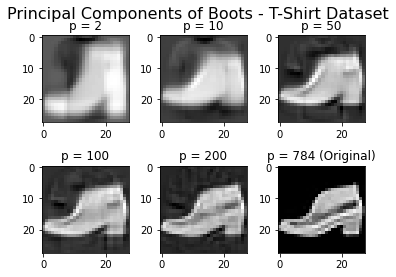

In [5]:
# Visualize PCs for boots & t-shirt
sample_image = X_train_tshirt_boot[np.random.choice(len(X_train_tshirt_boot)), :]

pc_tshirt_boot_2 = (sample_image @ pc_tshirt_boot[:, :2] @ pc_tshirt_boot[:, :2].T)
pc_tshirt_boot_10 = (sample_image @ pc_tshirt_boot[:, :10] @ pc_tshirt_boot[:, :10].T)
pc_tshirt_boot_50 = (sample_image @ pc_tshirt_boot[:, :50] @ pc_tshirt_boot[:, :50].T)
pc_tshirt_boot_100 = (sample_image @ pc_tshirt_boot[:, :100] @ pc_tshirt_boot[:, :100].T)
pc_tshirt_boot_200 = (sample_image @ pc_tshirt_boot[:, :200] @ pc_tshirt_boot[:, :200].T)
pc_tshirt_boot_784 = (sample_image @ pc_tshirt_boot[:, :784] @ pc_tshirt_boot[:, :784].T)

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('Principal Components of Boots - T-Shirt Dataset', fontsize = 16)
axs[0, 0].set_title('p = 2')
axs[0, 0].imshow(pc_tshirt_boot_2.reshape((28, 28)), cmap='gray')
axs[0, 1].set_title('p = 10')
axs[0, 1].imshow(pc_tshirt_boot_10.reshape((28, 28)), cmap='gray')
axs[0, 2].set_title('p = 50')
axs[0, 2].imshow(pc_tshirt_boot_50.reshape((28, 28)), cmap='gray')
axs[1, 0].set_title('p = 100')
axs[1, 0].imshow(pc_tshirt_boot_100.reshape((28, 28)), cmap='gray')
axs[1, 1].set_title('p = 200')
axs[1, 1].imshow(pc_tshirt_boot_200.reshape((28, 28)), cmap='gray')
axs[1, 2].set_title('p = 784 (Original)')
axs[1, 2].imshow(pc_tshirt_boot_784.reshape((28, 28)), cmap='gray')

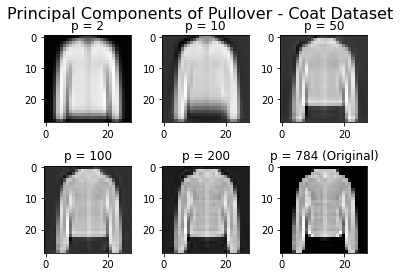

In [6]:
# Visualize PCs for pullover & coat
sample_image = X_train_pullover_coat[np.random.choice(len(X_train_tshirt_boot)), :]

pc_pullover_coat_2 = (sample_image @ pc_pullover_coat[:, :2] @ pc_pullover_coat[:, :2].T)
pc_pullover_coat_10 = (sample_image @ pc_pullover_coat[:, :10] @ pc_pullover_coat[:, :10].T)
pc_pullover_coat_50 = (sample_image @ pc_pullover_coat[:, :50] @ pc_pullover_coat[:, :50].T)
pc_pullover_coat_100 = (sample_image @ pc_pullover_coat[:, :100] @ pc_pullover_coat[:, :100].T)
pc_pullover_coat_200 = (sample_image @ pc_pullover_coat[:, :200] @ pc_pullover_coat[:, :200].T)
pc_pullover_coat_784 = (sample_image @ pc_pullover_coat[:, :784] @ pc_pullover_coat[:, :784].T)

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('Principal Components of Pullover - Coat Dataset', fontsize = 16)
axs[0, 0].set_title('p = 2')
axs[0, 0].imshow(pc_pullover_coat_2.reshape((28, 28)), cmap='gray')
axs[0, 1].set_title('p = 10')
axs[0, 1].imshow(pc_pullover_coat_10.reshape((28, 28)), cmap='gray')
axs[0, 2].set_title('p = 50')
axs[0, 2].imshow(pc_pullover_coat_50.reshape((28, 28)), cmap='gray')
axs[1, 0].set_title('p = 100')
axs[1, 0].imshow(pc_pullover_coat_100.reshape((28, 28)), cmap='gray')
axs[1, 1].set_title('p = 200')
axs[1, 1].imshow(pc_pullover_coat_200.reshape((28, 28)), cmap='gray')
axs[1, 2].set_title('p = 784 (Original)')
axs[1, 2].imshow(pc_pullover_coat_784.reshape((28, 28)), cmap='gray')

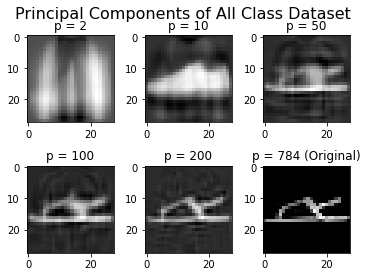

In [7]:
# Visualize PCs for all classes
sample_image = X_train_all_class[np.random.choice(len(X_train_all_class)), :]

pc_all_class_2 = (sample_image @ pc_all_class[:, :2] @ pc_all_class[:, :2].T)
pc_all_class_10 = (sample_image @ pc_all_class[:, :10] @ pc_all_class[:, :10].T)
pc_all_class_50 = (sample_image @ pc_all_class[:, :50] @ pc_all_class[:, :50].T)
pc_all_class_100 = (sample_image @ pc_all_class[:, :100] @ pc_all_class[:, :100].T)
pc_all_class_200 = (sample_image @ pc_all_class[:, :200] @ pc_all_class[:, :200].T)
pc_all_class_784 = (sample_image @ pc_all_class[:, :784] @ pc_all_class[:, :784].T)

fig, axs = plt.subplots(2, 3)
plt.subplots_adjust(hspace = 0.5)
fig.suptitle('Principal Components of All Class Dataset', fontsize = 16)
axs[0, 0].set_title('p = 2')
axs[0, 0].imshow(pc_all_class_2.reshape((28, 28)), cmap='gray')
axs[0, 1].set_title('p = 10')
axs[0, 1].imshow(pc_all_class_10.reshape((28, 28)), cmap='gray')
axs[0, 2].set_title('p = 50')
axs[0, 2].imshow(pc_all_class_50.reshape((28, 28)), cmap='gray')
axs[1, 0].set_title('p = 100')
axs[1, 0].imshow(pc_all_class_100.reshape((28, 28)), cmap='gray')
axs[1, 1].set_title('p = 200')
axs[1, 1].imshow(pc_all_class_200.reshape((28, 28)), cmap='gray')
axs[1, 2].set_title('p = 784 (Original)')
axs[1, 2].imshow(pc_all_class_784.reshape((28, 28)), cmap='gray')

In [18]:
# Logistic regression via stochastic gradient descent

class LogisticRegression:
    
    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-1 * x))
    
    @staticmethod
    def loss(X, y, w): 
        # Calculate all y_hat in a batch in matrix [n, k]
        y_hat = LogisticRegression.sigmoid(np.dot(X, w))
        # Calculate cross-entropy loss
        return -1 * (np.dot(y.T, np.log(y_hat + 1E-8)) + np.dot((1 - y).T, np.log(1 - y_hat + 1E-8))).item()
    
    @staticmethod
    def loss_gradient(X, y, w): 
        y_hat = LogisticRegression.sigmoid(np.dot(X, w))
        diff = y - y_hat
        # Caulculate gradient
        gradient = np.dot(X.T, diff)
        return -1 * gradient

    @staticmethod
    def predict(X, w):
        y = LogisticRegression.sigmoid(np.dot(X, w))
        # Yield categorical prediction results
        return np.array([0 if score <= 0.5 else 1 for score in y]).reshape(-1, 1)

    @staticmethod
    def batch(X, y, num_batch, index):
        # Non-uniform batch
        X_folds = np.vsplit(X, num_batch)
        y_folds = np.split(y, num_batch)
        X_val_set = X_folds[index]
        y_val_set = y_folds[index]
        X_train_set = [X_folds[i] for i in range(len(X_folds)) if i != index]
        y_train_set = [y_folds[i] for i in range(len(y_folds)) if i != index]

        return X_train_set, y_train_set, X_val_set, y_val_set

    @staticmethod
    def accuracy(y_output, y_target): 
        count = [1 if output == target else 0 for output, target in zip(y_output, y_target)]
        return sum(count) / len(y_output)

In [10]:
# [1/2] Training - T-shirt & Boots

# Number of PCs
p = 400

# Hyper-parameters
learning_rate = 0.01
num_batch = 10
epoch = 100

# Perform PCA on every X_train batch
X_train_tshirt_boot_pc = np.vstack([np.ones(len(X_train_tshirt_boot)), (X_train_tshirt_boot @ pc_tshirt_boot[:,:p]).T]).T
X_test_tshirt_boot_pc = np.vstack([np.ones(len(X_test_tshirt_boot)), (X_test_tshirt_boot @ pc_tshirt_boot[:,:p]).T]).T 

In [19]:
best_loss = float('inf')
best_w = np.zeros((p + 1, 1))

# Train <num_batch> rounds
for i in range(num_batch):
    # Disassemble X_train and Y_train into <num_batch> batches, and select folds based on i.
    X_train_set, y_train_set, X_val_set, y_val_set = LogisticRegression.batch(X_train_tshirt_boot_pc, y_train_tshirt_boot, num_batch, i)
    
    # Reset w
    w = np.zeros((p + 1, 1))
    
    # Train <epoch> rounds with 9 folds of X_train_set and 1 fold of X_val_set
    for trial in range(epoch):
        
        # Randomize the order of the indices into the training set
        shuffled_indices = np.random.permutation(len(X_train_set))
        
        # Decrease W value every folds, prevent over fitting as well
        for j in shuffled_indices:
            w = w - learning_rate * LogisticRegression.loss_gradient(X_train_set[j], y_train_set[j], w)
        
        # Predict with X_val_set using trained W and compare with target
        y = LogisticRegression.predict(X_val_set, w)
        # print('Epoch', trial, '/', epoch, ', accuarcy:', accuracy(y, y_val_set))
        
    fold_loss = LogisticRegression.loss(X_val_set, y_val_set, w)
    
    if (fold_loss < best_loss):
        best_loss = fold_loss
        best_w = w
        print('[+] Fold', i, 'Loss', fold_loss)
    else:
        print('Fold', i, 'Loss', fold_loss)

w = best_w
        
# Testing with test set
y_test_prediction = LogisticRegression.predict(X_test_tshirt_boot_pc, w)

print("Final accuracy: ", LogisticRegression.accuracy(y_test_prediction, y_test_tshirt_boot))

[+] Fold 0 Loss 0.001433223621885805
Fold 1 Loss 14.914881564477628
Fold 2 Loss 12.126856521123711
Fold 3 Loss 21.04831808683049
[+] Fold 4 Loss 1.1965456133737479e-06
Fold 5 Loss 0.0033161793754770998
Fold 6 Loss 12.009638291095078
Fold 7 Loss 30.824784218073493
Fold 8 Loss 6.858745591044138e-05
Fold 9 Loss 2.2641901730320915
Final accuracy:  0.9995


In [20]:
# [2/2] Training - Pullover & Coat

# Number of PCs
p = 400

# Hyper-parameters
learning_rate = 0.01
num_batch = 10
epoch = 100

X_train_pullover_coat_pc = np.vstack([np.ones(len(X_train_pullover_coat)), (X_train_pullover_coat @ pc_pullover_coat[:,:p]).T]).T
X_test_pullover_coat_pc = np.vstack([np.ones(len(X_test_pullover_coat)), (X_test_pullover_coat @ pc_pullover_coat[:,:p]).T]).T

In [ ]:
best_loss = float('inf')
best_w = np.zeros((p + 1, 1))

# Train <num_batch> rounds
for i in range(num_batch):
    # Disassemble X_train and Y_train into <num_batch> batches, and select folds based on i.
    X_train_set, y_train_set, X_val_set, y_val_set = LogisticRegression.batch(X_train_pullover_coat_pc, y_train_pullover_coat, num_batch, i)
    
    # Train <epoch> rounds with 9 folds of X_train_set and 1 fold of X_val_set
    for trial in range(epoch):
        
        # Randomize the order of the indices into the training set
        shuffled_indices = np.random.permutation(len(X_train_set))
        
        # Decrease W value every folds, prevent over fitting as well
        for j in shuffled_indices:
            w = w - learning_rate * LogisticRegression.loss_gradient(X_train_set[j], y_train_set[j], w)
        
        # Predict with X_val_set using trained W and compare with target
        y = LogisticRegression.predict(X_val_set, w)
        # print('Epoch', trial, '/', epoch, ', accuarcy:', accuracy(y, y_val_set))
        
    fold_loss = LogisticRegression.loss(X_val_set, y_val_set, w)
    
    if (fold_loss < best_loss):
        best_loss = fold_loss
        best_w = w
        print('[+] Fold', i, 'Loss', fold_loss)
    else:
        print('Fold', i, 'Loss', fold_loss)
        
w = best_w

# Testing with test set
y_test_prediction = LogisticRegression.predict(X_test_pullover_coat_pc, w)

print("final accuracy:", LogisticRegression.accuracy(y_test_prediction, y_test_pullover_coat))

<ipython-input-18-499531031b74>:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-1 * x))


[+] Fold 0 Loss 4054.4559879361004
Fold 1 Loss 8018.175642880835


In [ ]:
# Softmax Regression
class SoftmaxRegression: 
    